# Exercício 2.1

* Classificação de padrões, conforme tabela abaixo, com o conjunto de treinamento dos 22 vetores Após 3 iterações, apresente o conjunto de testes de 8 vetores.

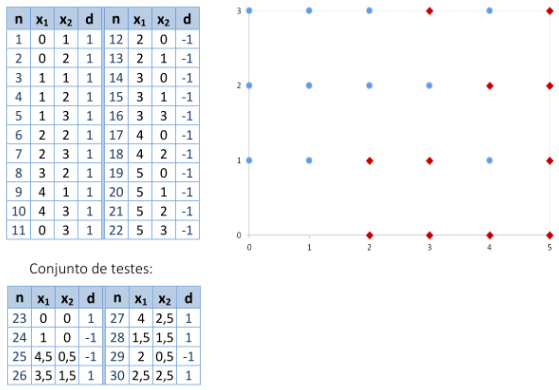

## Algoritmo

In [1]:

public double ErroQuadraticoMedio(int _n_linhas, int _n_colunas, double[,] _x, double[] _d, double[] _w ,double _theta){
    
    double somaQuadradoDaDiferenca = 0;

    int c = 1;
    
    for(int linha=0;linha<_n_linhas;linha++){
                
        double y =0;
        double yEstrela=0;
        Console.WriteLine($"Entrada_ErroQuadradoMedio:{linha+c}");
        //calculando somatório das variáveis da entrada
        for(int coluna=0;coluna<_n_colunas;coluna++){

            yEstrela += _x[linha,coluna]*_w[coluna];

        }

        //adicionando theta ao somatório
        yEstrela = yEstrela + _theta;
        Console.WriteLine($"yEstrela_ErroQuadradoMedio:{yEstrela}");

        if(yEstrela>=0){
            y=1;
        }else{
            y=-1;
        }
        Console.WriteLine($"y_ErroQuadradoMedio:{y}");
        var quadradoDiferenca = Math.Pow((_d[linha]-y),2);
        Console.WriteLine($"quadradoDiferenca_ErroQuadradoMedio:{quadradoDiferenca}");
        somaQuadradoDaDiferenca+= quadradoDiferenca;

    }

    Console.WriteLine($"ErroQuadradoMedio:{somaQuadradoDaDiferenca/2}");
    return somaQuadradoDaDiferenca/2;

}



public (double[] _w, double _theta) Adalaine(int n_iteracoes, int[][] ordem, double[] w, double alpha, double theta,double[,] x, int n_linhas, int n_colunas,double[] d,double erroAceito= 10){

    int contagem_iteracoes = 1;
    bool continuarLoop = true;
    //Váriaveis necessárias para cálculo da atualização
    double yEstrela =0;
    int c = 1;
    while(contagem_iteracoes<=n_iteracoes && continuarLoop ){

        Console.WriteLine($"Iteração {contagem_iteracoes}");

        foreach(var linha in ordem[contagem_iteracoes-1]){
                
                Console.WriteLine($"Entrada:{linha}");

                //zerando variáveis
                yEstrela=0;
                
                //calculando somatório das variáveis da entrada
                for(int coluna=0;coluna<n_colunas;coluna++){

                    yEstrela += x[linha-c,coluna]*w[coluna];

                }

                //adicionando theta ao somatório
                yEstrela = yEstrela + theta;
                Console.WriteLine($"yEstrela:{yEstrela}");

                //calculando somatório das variáveis da entrada
                for(int coluna=0;coluna<n_colunas;coluna++){
                    
                    Console.WriteLine($"x_{linha-c}_{coluna}:{x[linha-c,coluna]}, w_{coluna}:{w[coluna]}");
                    
                    //Aplica o gradiente e atualiza w
                    w[coluna] = w[coluna] + alpha*(d[linha-c]-yEstrela)*x[linha-c,coluna];
                    Console.WriteLine($"w*_{coluna}:{w[coluna]}");

                }

                //aplica o gradiente e atualiza theta
                theta = theta + alpha*(d[linha-c]-yEstrela);
                Console.WriteLine($"theta*:{theta}");
            }

            continuarLoop = !(ErroQuadraticoMedio(n_linhas, n_colunas, x, d, w ,theta) <= erroAceito);
            contagem_iteracoes++;
            
        }

    return (w,theta);

}

## Entradas

In [2]:
// iniciando a matriz de entradas
// lembrando que c# começa em zero por isso a variável c para corrigir o índice
int c = 1;
int n_linha = 22;
int n_colunas = 2;
double[,] x = new double[n_linha,n_colunas];
x[1-c,1-c]=0;
x[1-c,2-c]=1;
x[2-c,1-c]=0;
x[2-c,2-c]=2;
x[3-c,1-c]=1;
x[3-c,2-c]=1;
x[4-c,1-c]=1;
x[4-c,2-c]=2;
x[5-c,1-c]=1;
x[5-c,2-c]=3;
x[6-c,1-c]=2;
x[6-c,2-c]=2;
x[7-c,1-c]=2;
x[7-c,2-c]=3;
x[8-c,1-c]=3;
x[8-c,2-c]=2;
x[9-c,1-c]=4;
x[9-c,2-c]=1;
x[10-c,1-c]=4;
x[10-c,2-c]=3;
x[11-c,1-c]=0;
x[11-c,2-c]=3;
x[12-c,1-c]=2;
x[12-c,2-c]=0;
x[13-c,1-c]=2;
x[13-c,2-c]=1;
x[14-c,1-c]=3;
x[14-c,2-c]=0;
x[15-c,1-c]=3;
x[15-c,2-c]=1;
x[16-c,1-c]=3;
x[16-c,2-c]=3;
x[17-c,1-c]=4;
x[17-c,2-c]=0;
x[18-c,1-c]=4;
x[18-c,2-c]=2;
x[19-c,1-c]=5;
x[19-c,2-c]=0;
x[20-c,1-c]=5;
x[20-c,2-c]=1;
x[21-c,1-c]=5;
x[21-c,2-c]=2;
x[22-c,1-c]=5;
x[22-c,2-c]=3;

//iniciando vetor da variável resposta
double[] d = new double[n_linha];
d[1-c]=1;
d[2-c]=1;
d[3-c]=1;
d[4-c]=1;
d[5-c]=1;
d[6-c]=1;
d[7-c]=1;
d[8-c]=1;
d[9-c]=1;
d[10-c]=1;
d[11-c]=1;
d[12-c]=-1;
d[13-c]=-1;
d[14-c]=-1;
d[15-c]=-1;
d[16-c]=-1;
d[17-c]=-1;
d[18-c]=-1;
d[19-c]=-1;
d[20-c]=-1;
d[21-c]=-1;
d[22-c]=-1;

//delta alpha e theta iniciais
double alpha = 0.2;
double theta = 0;

//iniciando o vetor de pesos 
double[] w = new double[n_colunas];
w[1-c]=0.7;
w[2-c] = 0.8;

//lista contendo a ordem específica das entradas em cada iteração, usada para "embaralhar" e diversificar o treinamento
int n_iteracoes = 6;
int[][] ordem = new int[n_iteracoes][];
ordem[1-c] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22];
ordem[2-c] = [1,22,2,21,3,20,4,19,5,18,6,17,7,16,8,15,9,14,10,13,11,12];
ordem[3-c] = [1,17,22,7,2,16,21,8,3,15,20,9,4,14,19,10,5,13,18,11,6,12];
ordem[4-c] = [1,22,2,21,3,20,4,19,5,18,6,17,7,16,8,15,9,14,10,13,11,12];
ordem[5-c] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22];
ordem[6-c] = [1,17,22,7,2,16,21,8,3,15,20,9,4,14,19,10,5,13,18,11,6,12];

## Treinamento

In [3]:
//realização do treimanto passando os dados de entrada
(double[] _w, double _theta) = Adalaine(n_iteracoes, ordem, w , alpha, theta, x, n_linha, n_colunas,d,10);

//plotando pesos w e o theta do resultado do treinamento
var resultado = "";
for(int i =0;i<_w.Length;i++){
    resultado += $"w_{i+c}:{w[i]} | ";
}
resultado +=$"theta:{_theta} | ";

Console.WriteLine($"Resultado: {resultado}");

Iteração 1
Entrada:1
yEstrela:0,8
x_0_0:0, w_0:0,7
w*_0:0,7
x_0_1:1, w_1:0,8
w*_1:0,8400000000000001
theta*:0,039999999999999994
Entrada:2
yEstrela:1,7200000000000002
x_1_0:0, w_0:0,7
w*_0:0,7
x_1_1:2, w_1:0,8400000000000001
w*_1:0,552
theta*:-0,10400000000000005
Entrada:3
yEstrela:1,148
x_2_0:1, w_0:0,7
w*_0:0,6704
x_2_1:1, w_1:0,552
w*_1:0,5224000000000001
theta*:-0,13360000000000002
Entrada:4
yEstrela:1,5816000000000003
x_3_0:1, w_0:0,6704
w*_0:0,5540799999999999
x_3_1:2, w_1:0,5224000000000001
w*_1:0,2897599999999999
theta*:-0,2499200000000001
Entrada:5
yEstrela:1,1734399999999996
x_4_0:1, w_0:0,5540799999999999
w*_0:0,519392
x_4_1:3, w_1:0,2897599999999999
w*_1:0,18569600000000014
theta*:-0,284608
Entrada:6
yEstrela:1,1255680000000003
x_5_0:2, w_0:0,519392
w*_0:0,4691647999999998
x_5_1:2, w_1:0,18569600000000014
w*_1:0,1354688
theta*:-0,3097216000000001
Entrada:7
yEstrela:1,0350143999999997
x_6_0:2, w_0:0,4691647999999998
w*_0:0,45515903999999996
x_6_1:3, w_1:0,1354688
w*_1:0,1144

# Testes

In [4]:
int ct = 1;
int n_linha_teste = 8;
int n_colunas_teste = 2;
double delta_teste = 0;
double[,] x_teste = new double[n_linha_teste,n_colunas_teste];
x_teste[1-ct,1-ct]=0;
x_teste[1-ct,2-ct]=0;
x_teste[2-ct,1-ct]=1;
x_teste[2-ct,2-ct]=0;
x_teste[3-ct,1-ct]=4.5;
x_teste[3-ct,2-ct]=0.5;
x_teste[4-ct,1-ct]=3.5;
x_teste[4-ct,2-ct]=1.5;
x_teste[5-ct,1-ct]=4;
x_teste[5-ct,2-ct]=2.5;
x_teste[6-ct,1-ct]=1.5;
x_teste[6-ct,2-ct]=1.5;
x_teste[7-ct,1-ct]=2;
x_teste[7-ct,2-ct]=0.5;
x_teste[8-ct,1-ct]=2.5;
x_teste[8-ct,2-ct]=2.5;

double[] d_teste = new double[n_linha_teste];
d_teste[1-ct]=1;
d_teste[2-ct]=-1;
d_teste[3-ct]=-1;
d_teste[4-ct]=1;
d_teste[5-ct]=1;
d_teste[6-ct]=1;
d_teste[7-ct]=-1;
d_teste[8-ct]=1;

Console.WriteLine($"Teste_ErroQuadraticoMedio: {ErroQuadraticoMedio(n_linha_teste, n_colunas_teste, x_teste, d_teste, _w ,_theta)}");

Entrada_ErroQuadradoMedio:1
yEstrela_ErroQuadradoMedio:1030573,2922668942
y_ErroQuadradoMedio:1
quadradoDiferenca_ErroQuadradoMedio:0
Entrada_ErroQuadradoMedio:2
yEstrela_ErroQuadradoMedio:515286,14613344695
y_ErroQuadradoMedio:1
quadradoDiferenca_ErroQuadradoMedio:4
Entrada_ErroQuadradoMedio:3
yEstrela_ErroQuadradoMedio:-1080556,3101387871
y_ErroQuadradoMedio:-1
quadradoDiferenca_ErroQuadradoMedio:0
Entrada_ErroQuadradoMedio:4
yEstrela_ErroQuadradoMedio:-149944,05361567636
y_ErroQuadradoMedio:-1
quadradoDiferenca_ErroQuadradoMedio:4
Entrada_ErroQuadradoMedio:5
yEstrela_ErroQuadradoMedio:7737,483707263484
y_ErroQuadradoMedio:1
quadradoDiferenca_ErroQuadradoMedio:0
Entrada_ErroQuadradoMedio:6
yEstrela_ErroQuadradoMedio:880630,2386512184
y_ErroQuadradoMedio:1
quadradoDiferenca_ErroQuadradoMedio:0
Entrada_ErroQuadradoMedio:7
yEstrela_ErroQuadradoMedio:207661,55519483134
y_ErroQuadradoMedio:1
quadradoDiferenca_ErroQuadradoMedio:4
Entrada_ErroQuadradoMedio:8
yEstrela_ErroQuadradoMedio:78066

# Referências
Matéria de metaheurísticas e aplicações - PPGMNE

Siqueira, P.H., "Metaheurísticas e Aplicações". Disponível em: <https://paulohscwb.github.io/metaheuristicas/>, Janeiro de 2021.

### Autor
<a href="https://www.linkedin.com/in/hesauhugocavalcanti/">Hesau Hugo</a>

### Professor
<a href="https://www.linkedin.com/in/paulo-henrique-siqueira-83080130/">Paulo Henrique Siqueira</a>